In [2]:
import numpy as np
import os
from datetime import date

from define_bait_layout import bait_list, plot_cache_map, plot_annotated_cache_map

import matplotlib.pyplot as plt

In [3]:
''' session params - update each time '''
bird_id = input("bird ID: ")

# for baiting sites
seed = input("random seed: ")
seed = np.array([seed]).astype(int)[0]

bird ID:  test_reboot
random seed:  2503180


In [4]:
''' make session dir '''
locker_root = "Z:/Isabel/data/acquisition/"
local_root = "C:/Users/Isabel/Documents/data_temp/"

# get today's date
today_raw = date.today().isoformat()
today = f"{today_raw[2:4]}{today_raw[5:7]}{today_raw[8:]}"

# make dir - remote
session_folder = f"{bird_id}_{today}/"
locker_path = f"{locker_root}{session_folder}"
if os.path.exists(locker_path):
    print("warning, locker folder already exists!")
else:
    os.mkdir(locker_path)

# make dir - local
session_folder = f"{bird_id}_{today}/"
local_path = f"{local_root}{session_folder}"
if os.path.exists(local_path):
    print("warning, local folder already exists!")
else:
    os.mkdir(local_path)

warning, locker folder already exists!


In [6]:
''' determine sites to bait '''
# to_bait = np.arange(5, 8) # first session
to_bait = np.arange(3, 6) # subsequent
rng = np.random.default_rng(seed=seed)
n_baits = rng.choice(to_bait)
baited_sites = bait_list(n_baits, seed)

# save the site numbers
baited_site_file = f"{session_path}baited_sites.txt"
np.savetxt(baited_site_file, baited_sites, fmt ='%.0f\n')

bait 4 sites: [ 8 17 45 46]


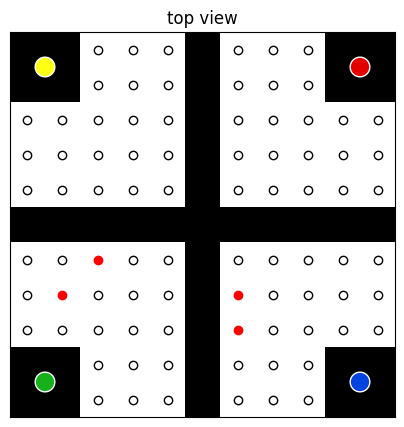

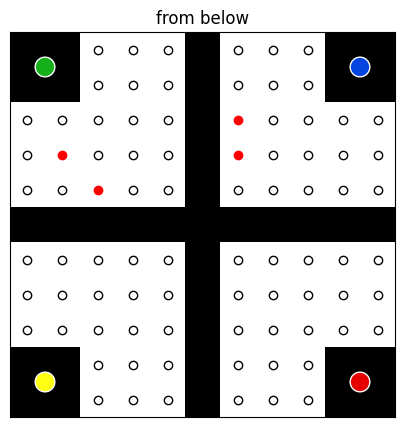

In [7]:
''' plot cache map w/ baits labeled '''
f, ax = plot_cache_map(baited_sites, top_view=True)
ax.set_title('top view')
plt.show()
f.savefig(f'{session_path}site_map_top.png', dpi=600, bbox_inches='tight')

f, ax = plot_cache_map(baited_sites, top_view=False)
ax.set_title('from below')
plt.show()
f.savefig(f'{session_path}site_map_bot.png', dpi=600, bbox_inches='tight')